# IA716 - Projet 2 - Evaluation of Neural Network Uncertainty

---

# Deep Learning and Uncertainty


**Structure of the following notebook**:
- Semantic segmentation with a Deep Neural Network
- Examination of DNN's prediction reliability
- Robustification of DNN's predictions


## I. PyTorch Tutorial

Basics of the PyTorch package, playing with toy examples.

If you already know how to use PyTorch, you can go directly to the second part of this tutorial.

## II. Training a Deep Neural Network for semantic segmentation

In this part, we will train a Deep Neural Network to perform semantic segmentation.

## II. Analyzing the results and working on the uncertainty

In this part, we will test your  Deep Neural Network and see if the results are ok



# I. PyTorch Tutorial
First let us build a start by descovering PyTorch.
Let us start by importing the library.


In [ ]:
import torch
import numpy as np

We are now going to build our first Tensors.
In Pytorch everything is based on tensors, while in Numpy it is base on  arrays. There are similarities, but it is not the same thing!

In [ ]:
# different way to build a tensor
x = torch.empty(5, 3)
print('empty',x)
print(x.size()) # by doing x.size() can see the shape of tensor x
x = torch.rand(5, 3)
print('random',x)
x = torch.zeros(5, 3, dtype=torch.long) # you build a tensor with just zeros
print('zeros',x)
x = torch.tensor([5.5, 3]) # you build a tensor from an list
print('tensor',x)
x = torch.ones(10, 3) # you build a tensor with just ones
print('ones',x)
# override dtype!
x = torch.randn_like(x, dtype=torch.float)
print(x)

empty tensor([[-1.1400e+17,  3.0824e-41,  3.3631e-44],
        [ 0.0000e+00,         nan,  3.0824e-41],
        [ 1.1578e+27,  1.1362e+30,  7.1547e+22],
        [ 4.5828e+30,  1.2121e+04,  7.1846e+22],
        [ 9.2198e-39,  7.0374e+22, -3.0886e+16]])
torch.Size([5, 3])
random tensor([[0.7087, 0.7626, 0.8359],
        [0.2872, 0.1703, 0.6284],
        [0.7850, 0.7696, 0.0268],
        [0.5939, 0.5784, 0.0311],
        [0.8889, 0.9237, 0.4022]])
zeros tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor tensor([5.5000, 3.0000])
ones tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[ 0.7945,  0.0804,  1.0721],
        [ 0.6728, -2.3605, -0.3893],
        [ 0.0221,  2.0718,  0.3662],
        [-0.2496, -0.1810, -1.9295],
        [ 0.9545, -0.4086,  1.4474],
      

Now let us play with operations between tensors

In [ ]:
y = torch.rand(5, 3)
x = torch.ones(5, 3)
z=x + y
print(z)

tensor([[1.7023, 1.2632, 1.9001],
        [1.1699, 1.7105, 1.5098],
        [1.3283, 1.7937, 1.8140],
        [1.2713, 1.7554, 1.9633],
        [1.0630, 1.6080, 1.5461]])


In [ ]:
torch.stack((x,y)).shape

torch.Size([2, 5, 3])

In [ ]:
# here is 3 different ways to change the shape of x
print(x)
x0=x.view((3,5))
print('original shape of x',x.size(),'new shape',x0.size())
x1=x.view(-1)
print('original shape of x',x.size(),'new shape',x1.size())

x2=x.transpose(0, 1)
print('original shape of x',x.size(),'new shape',x2.size())

x3=x.reshape((3,5))
print('original shape of x',x.size(),'new shape',x3.size())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])
original shape of x torch.Size([5, 3]) new shape torch.Size([15])
original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])
original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])


From Pytorch to Numpy


In [ ]:
x=  torch.randn(4, 4)
print('the type of x is :',type(x))
xnumpy=x.numpy()
print('the type of xnumpy is :',type(xnumpy))

the type of x is : <class 'torch.Tensor'>
the type of xnumpy is : <class 'numpy.ndarray'>


In [ ]:
x2=torch.tensor([1.0])
print('the type of x is :',type(x2))
x2numpy=x2.numpy()
print('the type of xnumpy is :',type(x2numpy))
x2numpy=x2.item()
print('the type of xnumpy is :',type(x2numpy))

the type of x is : <class 'torch.Tensor'>
the type of xnumpy is : <class 'numpy.ndarray'>
the type of xnumpy is : <class 'float'>


**Q1/ why the next command do not work?**



In [ ]:
# Not the same datatype
#y =xnumpy+x

**Q2/ Please find a way to bring a = np.ones(5) to the GPU?**

In [ ]:
# Answer
a=np.ones(5)
print(a)
a=torch.from_numpy(a).cuda()
print(a)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], device='cuda:0', dtype=torch.float64)


# II. Training a Deep Neural Network for semantic segmentation

---



---


Now let us perform a semantic segmentation DNN. We will first build a datasetloader and then train the DNN.


In [ ]:
# here are the training parameters
batch_size = 10
learning_rate =1e-3
weight_decay=2e-4
lr_decay_epochs=20
lr_decay=0.1
nb_epochs=50

Link to the [camvid](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/) dataset: https://drive.google.com/drive/folders/1HBj97T5aO-NoAEnUy_GfaS1fK5Epf0W2?usp=sharing

## A. building the dataset
Please note that we set as background the car, the bicyclist and pedestrian. So the CNN never see these classes.

In [ ]:
import os

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.utils.data as data
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from PIL import Image

from google.colab import drive

In [ ]:
# First you download the camvid dataset from the link (wwwww ) and you put it in your google colab
# Then let us mount you google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


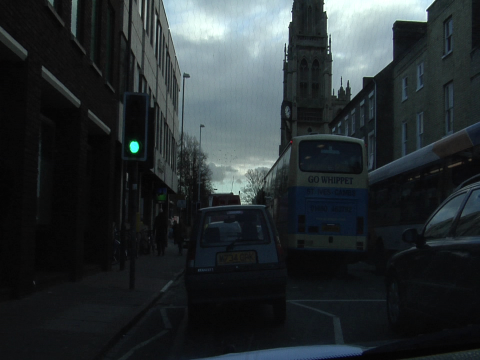

In [ ]:
#  Please check that you can read an image  from camvid dataset

# Julien
# PATH_data = '/content/drive/My Drive/TP Computer vision/Projet2/CamVid'
# PATH_save = '/content/drive/My Drive/TP Computer vision/Projet2'
# im = Image.open(PATH_data+"/train/0001TP_006690.png")
# im

# PATH_save = "/content/drive/MyDrive/Telecom_projects/Vision"
# PATH_data = '/content/drive/MyDrive/Colab Notebooks/CamVid'
# im = Image.open(PATH_data+"/train/0001TP_006690.png")
# im

# Joachim
PATH_save = '/content/drive/MyDrive/Colab Notebooks/IA716 - Perception pour les systèmes autonomes/Projet 2/'
PATH_data= '/content/drive/MyDrive/Colab Notebooks/IA716 - Perception pour les systèmes autonomes/Projet 2/CamVid'
im = Image.open(PATH_data+"/train/0001TP_006690.png")
im

 here is a set of utils function for the dataset and the evaluation

In [ ]:
import os

from collections import OrderedDict
import torch.utils.data as data
import numpy as np
from torchvision.transforms import ToPILImage

def get_files(folder, name_filter=None, extension_filter=None):
    """Helper function that returns the list of files in a specified folder
    with a specified extension.

    Keyword arguments:
    - folder (``string``): The path to a folder.
    - name_filter (```string``, optional): The returned files must contain
    this substring in their filename. Default: None; files are not filtered.
    - extension_filter (``string``, optional): The desired file extension.
    Default: None; files are not filtered

    """
    if not os.path.isdir(folder):
        raise RuntimeError("\"{0}\" is not a folder.".format(folder))

    # Filename filter: if not specified don't filter (condition always true);
    # otherwise, use a lambda expression to filter out files that do not
    # contain "name_filter"
    if name_filter is None:
        # This looks hackish...there is probably a better way
        name_cond = lambda filename: True
    else:
        name_cond = lambda filename: name_filter in filename

    # Extension filter: if not specified don't filter (condition always true);
    # otherwise, use a lambda expression to filter out files whose extension
    # is not "extension_filter"
    if extension_filter is None:
        # This looks hackish...there is probably a better way
        ext_cond = lambda filename: True
    else:
        ext_cond = lambda filename: filename.endswith(extension_filter)

    filtered_files = []

    # Explore the directory tree to get files that contain "name_filter" and
    # with extension "extension_filter"
    for path, _, files in os.walk(folder):
        files.sort()
        for file in files:
            if name_cond(file) and ext_cond(file):
                full_path = os.path.join(path, file)
                filtered_files.append(full_path)

    return filtered_files


def pil_loader(data_path, label_path):
    """Loads a sample and label image given their path as PIL images.

    Keyword arguments:
    - data_path (``string``): The filepath to the image.
    - label_path (``string``): The filepath to the ground-truth image.

    Returns the image and the label as PIL images.

    """
    data = Image.open(data_path)
    label = Image.open(label_path)

    return data, label

def batch_transform(batch, transform):
    """Applies a transform to a batch of samples.

    Keyword arguments:
    - batch (): a batch os samples
    - transform (callable): A function/transform to apply to ``batch``

    """

    # Convert the single channel label to RGB in tensor form
    # 1. torch.unbind removes the 0-dimension of "labels" and returns a tuple of
    # all slices along that dimension
    # 2. the transform is applied to each slice
    transf_slices = [transform(tensor) for tensor in torch.unbind(batch)]

    return torch.stack(transf_slices)

def remap(image, old_values, new_values):
    assert isinstance(image, Image.Image) or isinstance(
        image, np.ndarray), "image must be of type PIL.Image or numpy.ndarray"
    assert type(new_values) is tuple, "new_values must be of type tuple"
    assert type(old_values) is tuple, "old_values must be of type tuple"
    assert len(new_values) == len(
        old_values), "new_values and old_values must have the same length"

    # If image is a PIL.Image convert it to a numpy array
    if isinstance(image, Image.Image):
        image = np.array(image)

    # Replace old values by the new ones
    tmp = np.zeros_like(image)
    for old, new in zip(old_values, new_values):
        # Since tmp is already initialized as zeros we can skip new values
        # equal to 0
        if new != 0:
            tmp[image == old] = new

    return Image.fromarray(tmp)


def enet_weighing(dataloader, num_classes, c=1.02):
    """Computes class weights as described in the ENet paper:

        w_class = 1 / (ln(c + p_class)),

    where c is usually 1.02 and p_class is the propensity score of that
    class:

        propensity_score = freq_class / total_pixels.

    References: https://arxiv.org/abs/1606.02147

    Keyword arguments:
    - dataloader (``data.Dataloader``): A data loader to iterate over the
    dataset.
    - num_classes (``int``): The number of classes.
    - c (``int``, optional): AN additional hyper-parameter which restricts
    the interval of values for the weights. Default: 1.02.

    """

    print(dataloader)
    class_count = 0
    total = 0
    for _, label in dataloader:
      label = label.cpu().numpy()
      # Flatten label
      flat_label = label.flatten()
      
      # Sum up the number of pixels of each class and the total pixel
      # counts for each label
      class_count += np.bincount(flat_label, minlength=num_classes)
      total += flat_label.size

    # Compute propensity score and then the weights for each class
    propensity_score = class_count / total
    class_weights = 1 / (np.log(c + propensity_score))

    return class_weights





class PILToLongTensor(object):
    """Converts a ``PIL Image`` to a ``torch.LongTensor``.
    Code adapted from: http://pytorch.org/docs/master/torchvision/transforms.html?highlight=totensor
    """

    def __call__(self, pic):
        """Performs the conversion from a ``PIL Image`` to a ``torch.LongTensor``.
        Keyword arguments:
        - pic (``PIL.Image``): the image to convert to ``torch.LongTensor``
        Returns:
        A ``torch.LongTensor``.
        """
        if not isinstance(pic, Image.Image):
            raise TypeError("pic should be PIL Image. Got {}".format(
                type(pic)))

        # handle numpy array
        if isinstance(pic, np.ndarray):
            img = torch.from_numpy(pic.transpose((2, 0, 1)))
            # backward compatibility
            return img.long()

        # Convert PIL image to ByteTensor
        img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))

        # Reshape tensor
        nchannel = len(pic.mode)
        img = img.view(pic.size[1], pic.size[0], nchannel)

        # Convert to long and squeeze the channels
        return img.transpose(0, 1).transpose(0,
                                             2).contiguous().long().squeeze_()


class LongTensorToRGBPIL(object):
    """Converts a ``torch.LongTensor`` to a ``PIL image``.
    The input is a ``torch.LongTensor`` where each pixel's value identifies the
    class.
    Keyword arguments:
    - rgb_encoding (``OrderedDict``): An ``OrderedDict`` that relates pixel
    values, class names, and class colors.
    """
    def __init__(self, rgb_encoding):
        self.rgb_encoding = rgb_encoding

    def __call__(self, tensor):
        """Performs the conversion from ``torch.LongTensor`` to a ``PIL image``
        Keyword arguments:
        - tensor (``torch.LongTensor``): the tensor to convert
        Returns:
        A ``PIL.Image``.
        """
        # Check if label_tensor is a LongTensor
        if not isinstance(tensor, torch.LongTensor):
            raise TypeError("label_tensor should be torch.LongTensor. Got {}"
                            .format(type(tensor)))
        # Check if encoding is a ordered dictionary
        if not isinstance(self.rgb_encoding, OrderedDict):
            raise TypeError("encoding should be an OrderedDict. Got {}".format(
                type(self.rgb_encoding)))

        # label_tensor might be an image without a channel dimension, in this
        # case unsqueeze it
        if len(tensor.size()) == 2:
            tensor.unsqueeze_(0)

        color_tensor = torch.ByteTensor(3, tensor.size(1), tensor.size(2))

        for index, (class_name, color) in enumerate(self.rgb_encoding.items()):
            # Get a mask of elements equal to index
            mask = torch.eq(tensor, index).squeeze_()
            # Fill color_tensor with corresponding colors
            for channel, color_value in enumerate(color):
                color_tensor[channel].masked_fill_(mask, color_value)

        return ToPILImage()(color_tensor)

## B building the Dataloader

**Q3/ please study the dataset a bit. What it is about?**

The Cambridge-driving Labeled Video Database (CamVid) provides ground truth labels that associate each pixel with one of 32 semantic classes. 
For train, validation and test sets, there are 2 repositories:
- One with the real images
- One with the mask associated to it (giving pixels their respective label values)

Here the number of classes has been reduced to 13, each one associated with a color encoding on the image. 

Plot images, have a look at the information link to camvid dataset

In [ ]:
class CamVid(data.Dataset):
    """CamVid dataset loader where the dataset is arranged as in
    https://github.com/alexgkendall/SegNet-Tutorial/tree/master/CamVid.


    Keyword arguments:
    - root_dir (``string``): Root directory path.
    - mode (``string``): The type of dataset: 'train' for training set, 'val'
    for validation set, and 'test' for test set.
    - transform (``callable``, optional): A function/transform that  takes in
    an PIL image and returns a transformed version. Default: None.
    - label_transform (``callable``, optional): A function/transform that takes
    in the target and transforms it. Default: None.
    - loader (``callable``, optional): A function to load an image given its
    path. By default ``default_loader`` is used.

    """
    # Training dataset root folders
    train_folder = 'train'
    train_lbl_folder = 'trainannot'

    # Validation dataset root folders
    val_folder = 'val'
    val_lbl_folder = 'valannot'

    # Test dataset root folders
    test_folder = 'test'
    test_lbl_folder = 'testannot'

    # Images extension
    img_extension = '.png'

    # Default encoding for pixel value, class name, and class color
    color_encoding = OrderedDict([
        ('sky', (128, 128, 128)),
        ('building', (128, 0, 0)),
        ('pole', (192, 192, 128)),
        ('road_marking', (255, 69, 0)),
        ('road', (128, 64, 128)),
        ('pavement', (60, 40, 222)),
        ('tree', (128, 128, 0)),
        ('sign_symbol', (192, 128, 128)),
        ('fence', (64, 64, 128)),
        ('car', (64, 0, 128)),
        ('pedestrian', (64, 64, 0)),
        ('bicyclist', (0, 128, 192)),
        ('unlabeled', (0, 0, 0))
    ])

    def __init__(self,
                 root_dir,
                 mode='train',
                 transform=None,
                 label_transform=None,
                 loader=pil_loader):
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform
        self.label_transform = label_transform
        self.loader = loader

        if self.mode.lower() == 'train':
            # Get the training data and labels filepaths
            self.train_data = get_files(
                os.path.join(root_dir, self.train_folder),
                extension_filter=self.img_extension)

            self.train_labels = get_files(
                os.path.join(root_dir, self.train_lbl_folder),
                extension_filter=self.img_extension)
        elif self.mode.lower() == 'val':
            # Get the validation data and labels filepaths
            self.val_data = get_files(
                os.path.join(root_dir, self.val_folder),
                extension_filter=self.img_extension)

            self.val_labels = get_files(
                os.path.join(root_dir, self.val_lbl_folder),
                extension_filter=self.img_extension)
        elif self.mode.lower() == 'test':
            # Get the test data and labels filepaths
            self.test_data = get_files(
                os.path.join(root_dir, self.test_folder),
                extension_filter=self.img_extension)

            self.test_labels = get_files(
                os.path.join(root_dir, self.test_lbl_folder),
                extension_filter=self.img_extension)
        else:
            raise RuntimeError("Unexpected dataset mode. "
                               "Supported modes are: train, val and test")

    def __getitem__(self, index):
        """
        Args:
        - index (``int``): index of the item in the dataset

        Returns:
        A tuple of ``PIL.Image`` (image, label) where label is the ground-truth
        of the image.

        """
        if self.mode.lower() == 'train':
            data_path, label_path = self.train_data[index], self.train_labels[
                index]
        elif self.mode.lower() == 'val':
            data_path, label_path = self.val_data[index], self.val_labels[
                index]
        elif self.mode.lower() == 'test':
            data_path, label_path = self.test_data[index], self.test_labels[
                index]
        else:
            raise RuntimeError("Unexpected dataset mode. "
                               "Supported modes are: train, val and test")

        img, label = self.loader(data_path, label_path)

        if self.transform is not None:
            img = self.transform(img)

        if self.label_transform is not None:
            label = self.label_transform(label)

        return img, label

    def __len__(self):
        """Returns the length of the dataset."""
        if self.mode.lower() == 'train':
            return len(self.train_data)
        elif self.mode.lower() == 'val':
            return len(self.val_data)
        elif self.mode.lower() == 'test':
            return len(self.test_data)
        else:
            raise RuntimeError("Unexpected dataset mode. "
                               "Supported modes are: train, val and test")



In [ ]:
print("\nLoading dataset...\n")
print("Dataset directory:", PATH_data)
#print("Save directory:", save_dir)

image_transform = transforms.Compose(
        [transforms.Resize((360, 480)),
         transforms.ToTensor()])

label_transform = transforms.Compose([
        transforms.Resize((360, 480), Image.NEAREST),
        PILToLongTensor()
    ])

image_transform_test = transforms.Compose(
        [transforms.Resize((360, 480)),
         transforms.ToTensor()])

# Get selected dataset
# Load the training set as tensors
train_set = CamVid(
        PATH_data,
        transform=image_transform,
        label_transform=label_transform)
train_loader = data.DataLoader(
        train_set,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4)

# Load the validation set as tensors
val_set = CamVid(
        PATH_data,
        mode='val',
        transform=image_transform,
        label_transform=label_transform)
val_loader = data.DataLoader(
        val_set,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4)

# Load the test set as tensors
test_set = CamVid(
        PATH_data,
        mode='test',
        transform=image_transform_test,
        label_transform=label_transform)
test_loader = data.DataLoader(
        test_set,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4)

# Get encoding between pixel valus in label images and RGB colors
class_encoding = train_set.color_encoding
print('class_encoding  >>>>>', class_encoding)
# Remove the road_marking class from the CamVid dataset as it's merged
# with the road class
#del class_encoding['road_marking']

# Get number of classes to predict
num_classes = len(class_encoding)

# Print information for debugging
print("Number of classes to predict:", num_classes)
print("Train dataset size:", len(train_set))
print("Validation dataset size:", len(val_set))

# Get a batch of samples to display

images, labels = iter(test_loader).next()
print("Image size:", images.size())
print("Label size:", labels.size())
print("Class-color encoding:", class_encoding)


# Get class weights from the selected weighing technique
print("\nComputing class weights...")
print("(this can take a while depending on the dataset size)")

class_weights = enet_weighing(train_loader, num_classes)

class_weights = torch.from_numpy(class_weights).float().cuda()
# Set the weight of the unlabeled class to 0

ignore_index = list(class_encoding).index('unlabeled')
class_weights[ignore_index] = 0
ignore_index = list(class_encoding).index('pedestrian')
class_weights[ignore_index] = 0
ignore_index = list(class_encoding).index('bicyclist')
class_weights[ignore_index] = 0
ignore_index = list(class_encoding).index('car')
class_weights[ignore_index] = 0

print("Class weights:", class_weights)


Loading dataset...

Dataset directory: /content/drive/MyDrive/Colab Notebooks/IA716 - Perception pour les systèmes autonomes/Projet 2/CamVid
class_encoding  >>>>> OrderedDict([('sky', (128, 128, 128)), ('building', (128, 0, 0)), ('pole', (192, 192, 128)), ('road_marking', (255, 69, 0)), ('road', (128, 64, 128)), ('pavement', (60, 40, 222)), ('tree', (128, 128, 0)), ('sign_symbol', (192, 128, 128)), ('fence', (64, 64, 128)), ('car', (64, 0, 128)), ('pedestrian', (64, 64, 0)), ('bicyclist', (0, 128, 192)), ('unlabeled', (0, 0, 0))])
Number of classes to predict: 13
Train dataset size: 367
Validation dataset size: 101


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:281: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


Image size: torch.Size([10, 3, 360, 480])
Label size: torch.Size([10, 360, 480])
Class-color encoding: OrderedDict([('sky', (128, 128, 128)), ('building', (128, 0, 0)), ('pole', (192, 192, 128)), ('road_marking', (255, 69, 0)), ('road', (128, 64, 128)), ('pavement', (60, 40, 222)), ('tree', (128, 128, 0)), ('sign_symbol', (192, 128, 128)), ('fence', (64, 64, 128)), ('car', (64, 0, 128)), ('pedestrian', (64, 64, 0)), ('bicyclist', (0, 128, 192)), ('unlabeled', (0, 0, 0))])

Computing class weights...
(this can take a while depending on the dataset size)
Class weights: tensor([ 5.7920,  4.4403, 34.0217,  3.4469, 15.9119,  9.0202, 32.0138, 32.4789,
        13.2071,  0.0000,  0.0000,  0.0000,  0.0000], device='cuda:0')


**Q4/ why do we need to evaluate the class_weights?**

The class weights are evaluated to deal with class imbalance, in case some classes are under-represented for example, the weighting allows the network to take attention to it when training.

In addition, class weights are used to ignore some classes that we don't want to train the model on.

## C. building the DNN

**Q5/ Do we really use Unet? What did I change :)? (that is hard)**

We use Unet with additional dropout layers

**Q6/Why Unet is a bad idea for our task?**

The original size of images for training UNet is 512x512 and here it is 360x480. The model can also be quite long to train.


**Q7/Why was Unet chosen ?**

UNet still remains a simple network to work with and is adapted to small datasets provided with data augmentation. It only consists of convolutional layers --> no fixed input size


In [ ]:
__all__ = ["UNet"]

class double_conv(nn.Module):
    '''(conv => BN => ReLU) * 2'''

    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(
            nn.MaxPool2d(2),
            double_conv(in_ch, out_ch)
        )

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()
        self.bilinear = bilinear

        self.up = nn.ConvTranspose2d(in_ch // 2, in_ch // 2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        if self.bilinear:
            x1 = F.interpolate(x1, scale_factor=2, mode='bilinear', align_corners=True)
        else:
            x1 = self.up(x1)

        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])

        # for padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd

        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x

#please note that we have added dropout layer to be abble to use MC dropout

class UNet(nn.Module):
    def __init__(self, classes):
        super(UNet, self).__init__()
        self.inc = inconv(3, 32)
        self.down1 = down(32, 64)
        self.down2 = down(64, 128)
        self.down3 = down(128, 256)
        self.down4 = down(256, 256)
        self.up1 = up(512, 128)
        self.up2 = up(256, 64)
        self.up3 = up(128, 32)
        self.up4 = up(64, 32)
        self.outc = outconv(32, classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = F.dropout2d(x, 0.1, training=self.training)
        x = self.up2(x, x3)
        x = F.dropout2d(x, 0.1, training=self.training)
        x = self.up3(x, x2)
        x = F.dropout2d(x, 0.1, training=self.training)
        x = self.up4(x, x1)
        x = F.dropout2d(x, 0.1, training=self.training)
        x = self.outc(x)

        return x

## D. Utility functions

### Metrics

In [ ]:
class Metric(object):
    """Base class for all metrics.
    From: https://github.com/pytorch/tnt/blob/master/torchnet/meter/meter.py
    """
    def reset(self):
        pass

    def add(self):
        pass

    def value(self):
        pass

class ConfusionMatrix(Metric):
    """Constructs a confusion matrix for a multi-class classification problems.
    Does not support multi-label, multi-class problems.
    Keyword arguments:
    - num_classes (int): number of classes in the classification problem.
    - normalized (boolean, optional): Determines whether or not the confusion
    matrix is normalized or not. Default: False.
    Modified from: https://github.com/pytorch/tnt/blob/master/torchnet/meter/confusionmeter.py
    """

    def __init__(self, num_classes, normalized=False):
        super().__init__()

        self.conf = np.ndarray((num_classes, num_classes), dtype=np.int32)
        self.normalized = normalized
        self.num_classes = num_classes
        self.reset()

    def reset(self):
        self.conf.fill(0)

    def add(self, predicted, target):
        """Computes the confusion matrix
        The shape of the confusion matrix is K x K, where K is the number
        of classes.
        Keyword arguments:
        - predicted (Tensor or numpy.ndarray): Can be an N x K tensor/array of
        predicted scores obtained from the model for N examples and K classes,
        or an N-tensor/array of integer values between 0 and K-1.
        - target (Tensor or numpy.ndarray): Can be an N x K tensor/array of
        ground-truth classes for N examples and K classes, or an N-tensor/array
        of integer values between 0 and K-1.
        """
        # If target and/or predicted are tensors, convert them to numpy arrays
        if torch.is_tensor(predicted):
            predicted = predicted.cpu().numpy()
        if torch.is_tensor(target):
            target = target.cpu().numpy()

        assert predicted.shape[0] == target.shape[0], \
            'number of targets and predicted outputs do not match'

        if np.ndim(predicted) != 1:
            assert predicted.shape[1] == self.num_classes, \
                'number of predictions does not match size of confusion matrix'
            predicted = np.argmax(predicted, 1)
        else:
            assert (predicted.max() < self.num_classes) and (predicted.min() >= 0), \
                'predicted values are not between 0 and k-1'

        if np.ndim(target) != 1:
            assert target.shape[1] == self.num_classes, \
                'Onehot target does not match size of confusion matrix'
            assert (target >= 0).all() and (target <= 1).all(), \
                'in one-hot encoding, target values should be 0 or 1'
            assert (target.sum(1) == 1).all(), \
                'multi-label setting is not supported'
            target = np.argmax(target, 1)
        else:
            assert (target.max() < self.num_classes) and (target.min() >= 0), \
                'target values are not between 0 and k-1'

        # hack for bincounting 2 arrays together
        x = predicted + self.num_classes * target
        bincount_2d = np.bincount(
            x.astype(np.int32), minlength=self.num_classes**2)
        assert bincount_2d.size == self.num_classes**2
        conf = bincount_2d.reshape((self.num_classes, self.num_classes))

        self.conf += conf

    def value(self):
        """
        Returns:
            Confustion matrix of K rows and K columns, where rows corresponds
            to ground-truth targets and columns corresponds to predicted
            targets.
        """
        if self.normalized:
            conf = self.conf.astype(np.float32)
            return conf / conf.sum(1).clip(min=1e-12)[:, None]
        else:
            return self.conf



class IoU(Metric):
    """Computes the intersection over union (IoU) per class and corresponding
    mean (mIoU).
    Intersection over union (IoU) is a common evaluation metric for semantic
    segmentation. The predictions are first accumulated in a confusion matrix
    and the IoU is computed from it as follows:
        IoU = true_positive / (true_positive + false_positive + false_negative).
    Keyword arguments:
    - num_classes (int): number of classes in the classification problem
    - normalized (boolean, optional): Determines whether or not the confusion
    matrix is normalized or not. Default: False.
    - ignore_index (int or iterable, optional): Index of the classes to ignore
    when computing the IoU. Can be an int, or any iterable of ints.
    """

    def __init__(self, num_classes, normalized=False, ignore_index=None):
        super().__init__()
        self.conf_metric = ConfusionMatrix(num_classes, normalized)

        if ignore_index is None:
            self.ignore_index = None
        elif isinstance(ignore_index, int):
            self.ignore_index = (ignore_index,)
        else:
            try:
                self.ignore_index = tuple(ignore_index)
            except TypeError:
                raise ValueError("'ignore_index' must be an int or iterable")

    def reset(self):
        self.conf_metric.reset()

    def add(self, predicted, target):
        """Adds the predicted and target pair to the IoU metric.
        Keyword arguments:
        - predicted (Tensor): Can be a (N, K, H, W) tensor of
        predicted scores obtained from the model for N examples and K classes,
        or (N, H, W) tensor of integer values between 0 and K-1.
        - target (Tensor): Can be a (N, K, H, W) tensor of
        target scores for N examples and K classes, or (N, H, W) tensor of
        integer values between 0 and K-1.
        """
        # Dimensions check
        assert predicted.size(0) == target.size(0), \
            'number of targets and predicted outputs do not match'
        assert predicted.dim() == 3 or predicted.dim() == 4, \
            "predictions must be of dimension (N, H, W) or (N, K, H, W)"
        assert target.dim() == 3 or target.dim() == 4, \
            "targets must be of dimension (N, H, W) or (N, K, H, W)"

        # If the tensor is in categorical format convert it to integer format
        if predicted.dim() == 4:
            _, predicted = predicted.max(1)
        if target.dim() == 4:
            _, target = target.max(1)

        self.conf_metric.add(predicted.view(-1), target.view(-1))

    def value(self):
        """Computes the IoU and mean IoU.
        The mean computation ignores NaN elements of the IoU array.
        Returns:
            Tuple: (IoU, mIoU). The first output is the per class IoU,
            for K classes it's numpy.ndarray with K elements. The second output,
            is the mean IoU.
        """
        conf_matrix = self.conf_metric.value()
        if self.ignore_index is not None:
            for index in self.ignore_index:
                conf_matrix[:, self.ignore_index] = 0
                conf_matrix[self.ignore_index, :] = 0
        true_positive = np.diag(conf_matrix)
        false_positive = np.sum(conf_matrix, 0) - true_positive
        false_negative = np.sum(conf_matrix, 1) - true_positive

        # Just in case we get a division by 0, ignore/hide the error
        with np.errstate(divide='ignore', invalid='ignore'):
            iou = true_positive / (true_positive + false_positive + false_negative)

        return iou, np.nanmean(iou)

In [ ]:
# Colors from Colorbrewer Paired_12
colors = [[31, 120, 180], [51, 160, 44]]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

def plot_losses(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation loss", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

def plot_accu(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training miou", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation miou", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

**Q8/  what is the IoU?**

Intersection over union (IoU) is a common evaluation metric for semantic segmentation. The predictions are first accumulated in a confusion matrix and the IoU is computed from it as follows:

        IoU = true_positive / (true_positive + false_positive + false_negative)


### Training function

In [ ]:
def train( model, data_loader, optim, criterion, metric,iteration_loss=False):
    model.train()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate(data_loader):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        # Forward propagation
        outputs = model(inputs)

        # Loss computation
        loss = criterion(outputs, labels)

        # Backpropagation
        optim.zero_grad()
        loss.backward()
        optim.step()

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of the evaluation metric
        metric.add(outputs.detach(), labels.detach())

        if iteration_loss:
            print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss / len(data_loader), metric.value()

### Validation function

In [ ]:
def test(model, data_loader, criterion, metric, iteration_loss=False):
    model.eval()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate(data_loader):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        with torch.no_grad():
            # Forward propagation
            outputs = model(inputs)

            # Loss computation
            loss = criterion(outputs, labels)

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of evaluation the metric
        metric.add(outputs.detach(), labels.detach())

        if iteration_loss:
            print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss / len(data_loader), metric.value()

## E. Training Process

**Q9/ please train your DNN and comment?**

In [ ]:
print("\nTraining...\n")
num_classes = len(class_encoding)
# Intialize UNet
model = UNet(num_classes).cuda()

# We are going to use the CrossEntropyLoss loss function as it's most
# frequentely used in classification problems with multiple classes which
# fits the problem. This criterion  combines LogSoftMax and NLLLoss.
criterion = nn.CrossEntropyLoss(weight=class_weights)

# We build the optimizer
optimizer = optim.Adam(
        model.parameters(),
        lr=learning_rate,
        weight_decay=weight_decay)

# Learning rate decay scheduler
lr_updater = lr_scheduler.StepLR(optimizer, lr_decay_epochs,
                                    lr_decay)

# Evaluation metric
ignore_index=[]
ignore_index0 = list(class_encoding).index('unlabeled')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('pedestrian')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('bicyclist')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('car')
ignore_index.append(ignore_index0)

metric = IoU(num_classes, ignore_index=ignore_index)

# Start Training
best_miou = 0
train_loss_history = []
val_loss_history = []
train_miou_history = []
val_miou_history = []
for epoch in range( nb_epochs):
  print(">>>> [Epoch: {0:d}] Training".format(epoch))
  
  epoch_loss, (iou, miou) = train(model, train_loader, optimizer, criterion, metric) 
  lr_updater.step()
  print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, epoch_loss, miou))
  train_miou=miou
  train_loss=epoch_loss
  if (epoch + 1) % 5 == 0 or epoch + 1 == nb_epochs:

    print(">>>> [Epoch: {0:d}] Validation".format(epoch))
    loss, (iou, miou) = test(model, val_loader, criterion, metric)
    print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, loss, miou))
    train_loss_history.append(train_loss)
    val_loss_history.append(loss)
    train_miou_history.append(train_miou)
    val_miou_history.append(miou)
    # Print per class IoU on last epoch or if best iou
    if epoch + 1 == nb_epochs or miou > best_miou:
      for key, class_iou in zip(class_encoding.keys(), iou):
        print("{0}: {1:.4f}".format(key, class_iou))
        # Save the model if it's the best thus far
        '''if miou > best_miou:
          print("\nBest model thus far. Saving...\n")
          best_miou = miou
          utils.save_checkpoint(model, optimizer, epoch + 1, best_miou,
                                      args)'''

    torch.save(model.state_dict(), PATH_save + '/Unet.pt')


Training...

>>>> [Epoch: 0] Training


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


>>>> [Epoch: 0] Avg. loss: 1.8988 | Mean IoU: 0.2675
>>>> [Epoch: 1] Training
>>>> [Epoch: 1] Avg. loss: 1.4070 | Mean IoU: 0.3503
>>>> [Epoch: 2] Training
>>>> [Epoch: 2] Avg. loss: 1.1774 | Mean IoU: 0.3977
>>>> [Epoch: 3] Training
>>>> [Epoch: 3] Avg. loss: 1.0049 | Mean IoU: 0.4455
>>>> [Epoch: 4] Training
>>>> [Epoch: 4] Avg. loss: 0.8795 | Mean IoU: 0.4785
>>>> [Epoch: 4] Validation
>>>> [Epoch: 4] Avg. loss: 0.7904 | Mean IoU: 0.4749
sky: 0.9398
building: 0.6946
pole: 0.0621
road_marking: 0.7683
road: 0.4946
pavement: 0.6870
tree: 0.0487
sign_symbol: 0.2576
fence: 0.3213
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan
>>>> [Epoch: 5] Training
>>>> [Epoch: 5] Avg. loss: 0.7920 | Mean IoU: 0.5055
>>>> [Epoch: 6] Training
>>>> [Epoch: 6] Avg. loss: 0.7514 | Mean IoU: 0.5157
>>>> [Epoch: 7] Training
>>>> [Epoch: 7] Avg. loss: 0.6638 | Mean IoU: 0.5411
>>>> [Epoch: 8] Training
>>>> [Epoch: 8] Avg. loss: 0.6430 | Mean IoU: 0.5515
>>>> [Epoch: 9] Training
>>>> [Epoch: 9] Avg. lo

# III. Evalution of the Trained DNN on the test

In [ ]:
# Load the model
num_classes = len(class_encoding)
# Intialize UNet
model = UNet(num_classes).cuda()
model.load_state_dict(torch.load(PATH_save + '/Unet.pt'))

criterion = nn.CrossEntropyLoss(weight=class_weights)

# Evaluation metric
ignore_index=[]
ignore_index0 = list(class_encoding).index('unlabeled')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('pedestrian')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('bicyclist')
ignore_index.append(ignore_index0)
ignore_index0 = list(class_encoding).index('car')
ignore_index.append(ignore_index0)

metric = IoU(num_classes, ignore_index=ignore_index)

## A. classical evaluations

**Q10/ please plot the loss and miou and comment about it ?**

The MIOU of the validation set reaches a plateau and doesn't increase after 25 epochs. For the loss it also doesn't decrease after epoch 25. 

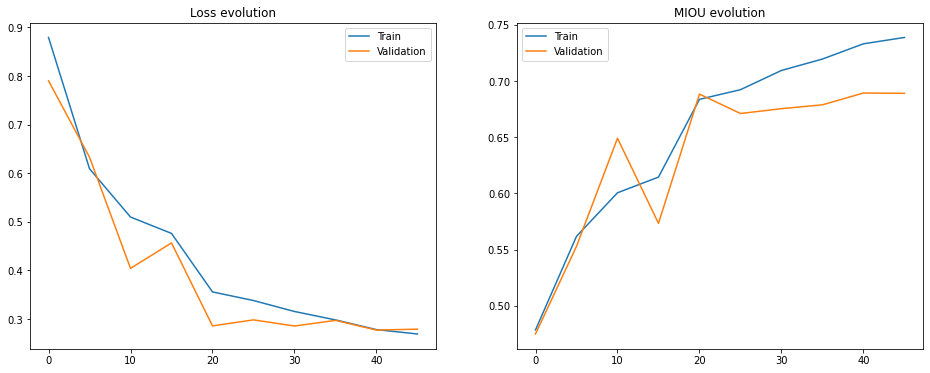

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax = ax.ravel()

#epoch_range = np.arange(0,nb_epochs+1,5)
epoch_range = np.arange(0,nb_epochs,5)
ax[0].plot(epoch_range, train_loss_history, label='Train')
ax[0].plot(epoch_range, val_loss_history, label='Validation')
ax[0].legend()
ax[0].set_title("Loss evolution")

ax[1].plot(epoch_range, train_miou_history, label='Train')
ax[1].plot(epoch_range, val_miou_history, label='Validation')
ax[1].legend()
ax[1].set_title("MIOU evolution")

plt.show()

**Q11/ what should we have done to avoid overfitting?**

To avoid overfitting, a common practice is to set an early stopping criteria: when the MIOU (or the loss) is not better after a certain number of epochs, the model stops the training. 

We could also have increased the dropout, test higher weights on the less represented classes or perform cross validation for training (i.e. change the validation set randomly at each epoch)

Finally, we can use weight decay in the optimizer which adds an L2 penalty to the training loss and reduces the magnitude of network coefficients, thus helping to prevent dropout.   
**please describe the curbs**


In [ ]:
# Now we evaluate the model on all the test set.
loss, (iou, miou) = test(model, test_loader, criterion, metric)
print(">>>> [FINAL TEST on the test set: ] Avg. loss: ", loss ," | Mean IoU: ", miou)
# Print per class IoU on last epoch or if best iou
for key, class_iou in zip(class_encoding.keys(), iou):
  print("{0}: {1:.4f}".format(key, class_iou))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


>>>> [FINAL TEST on the test set: ] Avg. loss:  0.6120915325979391  | Mean IoU:  0.5898483968402451
sky: 0.9163
building: 0.6759
pole: 0.1996
road_marking: 0.9112
road: 0.7348
pavement: 0.6871
tree: 0.2105
sign_symbol: 0.2268
fence: 0.7464
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan


## B. Uncertainty evaluations with MCP
Here you will just use as confidence score the Maximum class probability (MCP)


In [ ]:
m = torch.nn.Softmax2d()
batch_images, batch_labels = iter(test_loader).next()
batch_images = batch_images.cuda()
batch_labels = batch_labels.cuda()
model.eval()
with torch.no_grad():
  # Forward propagation
  outputs = model(batch_images)
  outputs0 = outputs[:,0:7,:,:]  # we delete the last class since we do not train on that
  outputs0_proba = m(outputs0)
  confidence, pred = outputs0_proba.max(1)



In [ ]:
print(outputs0.size(), outputs0_proba.size())
#print(outputs0_proba)

torch.Size([10, 7, 360, 480]) torch.Size([10, 7, 360, 480])


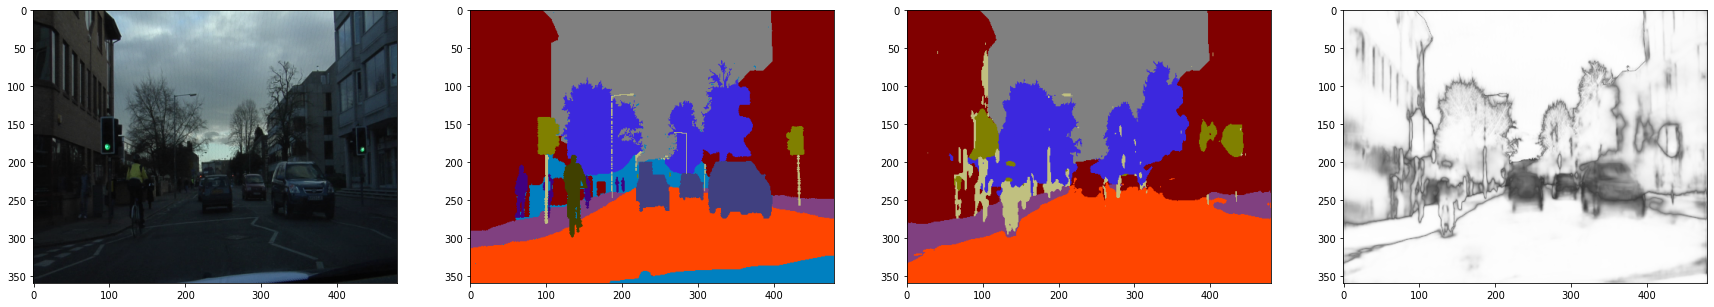

In [ ]:
img_id=0
label_to_rgb = transforms.Compose([
        LongTensorToRGBPIL(class_encoding),
        transforms.ToTensor()])
color_predictions = batch_transform(pred.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy()
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidenceimg = torchvision.utils.make_grid(confidence[img_id].cpu()).numpy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()


**Q12/ The last image is the related to the confidence score of the DNN. Can you explain why?**
**Are you happy with this image?**

Here we take as confidence the maximum class probability. The last image corresponds to the maximum of the softmax function, applied to each pixel, which gives the probabilities of belonging to each class. We are not very happy with this image since some pixels should have higher probabilities of belonging to each class, that means the distinction is not very clear for the network between the different classes. However, we can see that the most uncertain areas are often the boundaries between two classes, which is quite satisfactory. 

## C. Uncertainty evaluations with Temperature Scaling
**Q13/ please implement a temperature scaling**

Temperature Scaling is a parametric calibration approach on the validation set using the Negative-Log-Likelihood (NLL) loss. It learns a single parameter $T$ for all classes to update the confidences to:

\begin{equation}
\hat{q}_i = max_k(softmax(z_i/T))
\end{equation}

To evaluate the calibration of our network we used the Expected Calibration Error (ECE). This is defined by the weighted average of the bins' accuracy/cofidence differences:

\begin{equation}
ECE = \sum_{m=1}^{M} \frac{|B_m|}{n} |acc(B_m) - conf(B_m)|
\end{equation}

In addition, to visualize the impact of our scaling, we plot the Reliability Diagram. It shows the relation between expected sample accuracy per bin and confidence:

\begin{equation}
acc(B_m) = \frac{1}{|B_m|} \sum_{i \in B_m} \mathbf{1}(\hat{y}_i = y_i)
\end{equation}

\begin{equation}
conf(B_m) = \frac{1}{|B_m|} \sum_{i \in B_m} \hat{p}_i
\end{equation}

Bars under the identity line show underconfident behavior while bars above it signal overconfidence. We choose a certain number of seperate bins where the predictions are put in their respective bin based on their magnitude ($Bin 1 = [0.0, 0.1), Bin 2 = [0.1, 0.2), ...)$).

We find the optimal temperature by performing gradient descent on all the validation set and using cross entropy loss as the NLL.

In [ ]:
def T_scaling(logits, args):
  temperature = args.get('temperature', None)
  return torch.div(logits, temperature)


def find_optimal_temperature(data_loader, model, criterion, n_epoch):
    temperature = nn.Parameter(torch.ones(1).cuda())
    args = {'temperature': temperature}
    optimizer = optim.Adam([temperature], lr=0.01)
    
    calibration_history = []
    for epoch in range(n_epoch):
        epoch_loss = 0
        print("--- Epoch {} ---".format(epoch))
        for step, batch_data in enumerate(data_loader):
            # Get the inputs and labels
            inputs = batch_data[0].cuda()
            labels = batch_data[1].cuda()

            model.eval()
            with torch.no_grad():
                # Forward propagation
                outputs = model(inputs)
                # Loss computation

            def closure():
                loss = criterion(T_scaling(outputs,args), labels)
                #print(loss.item())
                optimizer.zero_grad()
                loss.backward()
                return loss

            epoch_loss+=criterion(T_scaling(outputs,args), labels).item()
            optimizer.step(closure)
        
        epoch_loss /= len(data_loader)
        calibration_history.append(epoch_loss)
        print("Loss at epoch {} --> {}".format(epoch, epoch_loss))

    return temperature, calibration_history

criterion = nn.CrossEntropyLoss()
n_epoch = 7
temperature, calibration_history = find_optimal_temperature(train_loader, model, criterion, n_epoch)

print('Final T_scaling factor: {:.2f}'.format(temperature.item()))

--- Epoch 0 ---
Loss at epoch 0 --> 0.5259808011957117
--- Epoch 1 ---
Loss at epoch 1 --> 0.5162558773079434
--- Epoch 2 ---
Loss at epoch 2 --> 0.5162420651397189
--- Epoch 3 ---
Loss at epoch 3 --> 0.5166334840091499
--- Epoch 4 ---
Loss at epoch 4 --> 0.5188583691377897
--- Epoch 5 ---
Loss at epoch 5 --> 0.516667813868136
--- Epoch 6 ---
Loss at epoch 6 --> 0.5168955164986688
Final T_scaling factor: 1.28


In [ ]:
import matplotlib.patches as mpatches

class _ECELoss(nn.Module):
    """
    Calculates the Expected Calibration Error of a model.
    The input to this loss is the logits of a model, NOT the softmax scores.
    This divides the confidence outputs into equally-sized interval bins.
    In each bin, we compute the confidence gap:
    bin_gap = | avg_confidence_in_bin - accuracy_in_bin |
    We then return a weighted average of the gaps, based on the number
    of samples in each bin
    """
    def __init__(self, n_bins=15, temperature=1):
        """
        n_bins (int): number of confidence interval bins
        temperature (float): value for temperature scaling, default=1 (no scaling)
        """
        super(_ECELoss, self).__init__()
        bin_boundaries = torch.linspace(0, 1, n_bins + 1)
        self.bounds = bin_boundaries.numpy()
        self.bin_lowers = bin_boundaries[:-1]
        self.bin_uppers = bin_boundaries[1:]
        self.temperature = temperature

    def forward(self, logits, labels, scaling=False, deep_ensemble=False, display_graph=True):
        accuracy_list, confidence_list = [], []

        if scaling:
            logits = torch.div(logits, self.temperature)
        
        # normal case, input is (N, K, H, W), 
        # deep ensemble case, input is (M, N, K, H, W)
        softmaxes = F.softmax(logits, dim=1)
        
        if deep_ensemble:
            softmaxes = F.softmax(logits, dim=2)
            softmaxes = torch.mean(softmaxes, dim=0)
        
        confidences, predictions = torch.max(softmaxes, 1)
        accuracies = predictions.eq(labels)

        ece = torch.zeros(1, device=logits.device)
        for bin_lower, bin_upper in zip(self.bin_lowers, self.bin_uppers):
            # Calculated |confidence - accuracy| in each bin
            in_bin = confidences.gt(bin_lower.item()) * confidences.le(bin_upper.item())
            prop_in_bin = in_bin.float().mean()
            if prop_in_bin.item() > 0:
                accuracy_in_bin = accuracies[in_bin].float().mean()
                accuracy_list.append(accuracy_in_bin.cpu().numpy())
                avg_confidence_in_bin = confidences[in_bin].mean()
                #confidence_list.append(avg_confidence_in_bin.detach().numpy())
                ece += torch.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin
            else:
                accuracy_list.append(0)
                #confidence_list.append(0)

        # Plot the confidence accuracy graph
        if display_graph:
            fig = plt.figure(figsize=(8, 8))
            ax = fig.gca()
            ax.set_xlim(0, 1.05)  # x/y limits
            ax.set_ylim(0, 1)

            plt.xlabel('Confidence')   # x/y labels
            plt.ylabel('Accuracy')
            
            ax.set_axisbelow(True)   # Create grid
            ax.grid(color='gray', linestyle='dashed')

            plt.bar(self.bounds[:-1], self.bounds[:-1], width=0.1, alpha=0.3, edgecolor='black', color='r', hatch='\\')  
            plt.bar(self.bounds[:-1], np.array(accuracy_list), width=0.1, alpha=1, edgecolor='black', color='b')   # Draw bars
            plt.plot([0,1],[0,1], '--', color='gray', linewidth=2)   # identity line

            plt.gca().set_aspect('equal', adjustable='box')   # Equally spaced axes

            ECE_patch = mpatches.Patch(color='green', label='ECE = {:.2f}%'.format(ece.item()*100))   # ECE display
            plt.legend(handles=[ECE_patch])

            #plt.savefig(f'/content/drive/My Drive/TP Computer vision/Projet2/network_calibration_scaling={scaling}.png', bbox_inches='tight')
            plt.show()

        return ece, accuracy_list, confidence_list

torch.Size([101, 13, 360, 480]) torch.Size([101, 360, 480])


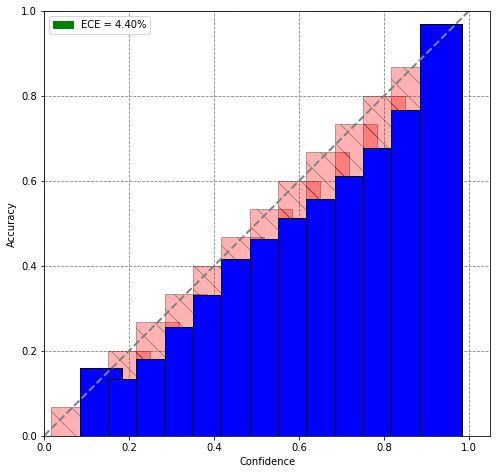

ECE before scaling 0.04396478086709976


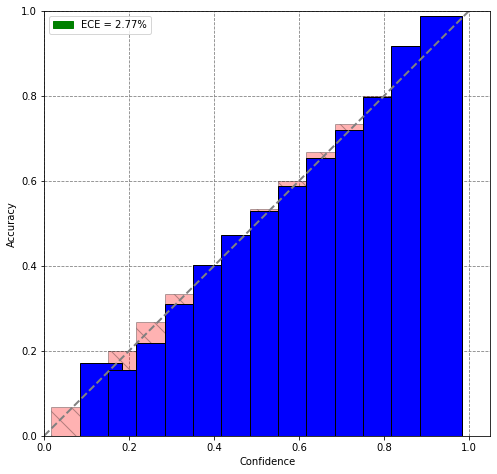

ECE after scaling 0.027705799788236618


In [ ]:
# Evaluate the temperature scaling on validation loader
logits_list = []
labels_list = []
for step, (batch_images, batch_labels) in enumerate(val_loader):
    batch_images = batch_images.cuda()
    batch_labels = batch_labels.cuda()
    model.eval()
    with torch.no_grad():
        # Forward propagation
        outputs = model(batch_images)
        logits_list.append(outputs)
        labels_list.append(batch_labels)
    

logits = torch.cat(logits_list).cuda()
labels = torch.cat(labels_list).cuda()
print(logits.size(), labels.size())

ece_criterion = _ECELoss()
ece, accuracy_list, confidence_list = ece_criterion(logits, labels)
print("ECE before scaling", ece.item())

ece_criterion = _ECELoss(temperature=temperature)
ece2, accuracy_list2, confidence_list2 = ece_criterion(logits, labels, scaling=True)
print("ECE after scaling", ece2.item())

## D. Uncertainty evaluations with MC Dropout

Let us implement **MC dropout**. This technique decribed in [this paper](https://arxiv.org/abs/1506.02142) allow us to have a better confindence score by using the dropout during test time.



**Q\14 Please implement MC Dropout.**

---- Confidence graph with MC dropout----


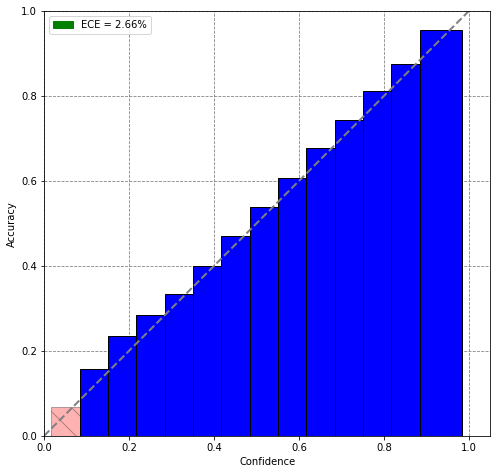

ECE with MC dropout 0.026608560234308243


In [ ]:
logits_list = []
labels_list = []
for step, (batch_images, batch_labels) in enumerate(val_loader):
    batch_images = batch_images.cuda()
    batch_labels = batch_labels.cuda()
    model.train()                    # Set training to True to use dropout during test time
    with torch.no_grad():
        # Forward propagation
        outputs = model(batch_images)     
        logits_list.append(outputs)
        labels_list.append(batch_labels)

logits = torch.cat(logits_list).cuda()
labels = torch.cat(labels_list).cuda()

print("---- Confidence graph with MC dropout----")
ece_criterion = _ECELoss()
ece_mc, accuracy_list_mc, confidence_list_mc = ece_criterion(logits, labels)
print("ECE with MC dropout", ece_mc.item())

## E. Uncertainty evaluations with Deep Ensembles
**Q\15 Please implement [Deep Ensembles](https://papers.nips.cc/paper/2017/file/9ef2ed4b7fd2c810847ffa5fa85bce38-Paper.pdf).**


1.   You need to train 3 DNNs and save it. On the next block I show you how to save and load a CNN.
2.   You need to rewrite the test function to perform Deep ensembles



Please train more models and save them on model1 and model2.

In [ ]:
from copy import deepcopy

# Write the test code and evaluate the results.
def ensemble_test(models, data_loader, criterion, metric):
    
    metrics = [deepcopy(metric) for model in models]
    for model, metric in zip(models, metrics):
        model.eval()
        metric.reset()
        for step, batch_data in enumerate(data_loader):
            # Get the inputs and labels
            inputs = batch_data[0].cuda()
            labels = batch_data[1].cuda()

            with torch.no_grad():
                # Forward propagation
                outputs = model(inputs)

                # Keep track of evaluation the metric
                metric.add(outputs.detach(), labels.detach())
    
    agg_iou = []
    agg_miou = []
    for metric in metrics:
        iou, miou = metric.value()
        print(iou, miou)
        agg_iou.append(iou)
        agg_miou.append(miou)
    agg_iou = np.array(agg_iou)
    agg_miou = np.array(agg_miou)
    agg_iou = np.mean(agg_iou, axis=0)
    agg_miou = np.mean(agg_miou)
    
    return agg_iou, agg_miou

In [ ]:
model1 = UNet(num_classes).cuda()
model1.load_state_dict(torch.load(PATH_save + '/Unet1.pt'))

<All keys matched successfully>

In [ ]:
model2 = UNet(num_classes).cuda()
model2.load_state_dict(torch.load(PATH_save + '/Unet2.pt'))

<All keys matched successfully>

In [ ]:
model3 = UNet(num_classes).cuda()
model3.load_state_dict(torch.load(PATH_save + '/Unet3.pt'))

<All keys matched successfully>

In [ ]:
models = [model1, model2, model3]

In [ ]:
# Now we evaluate the model on all the test set.
iou, miou = ensemble_test(models, test_loader, criterion, metric)
print(">>>> [FINAL TEST on the test set: ] Mean IoU: ", miou)
# Print per class IoU on last epoch or if best iou
for key, class_iou in zip(class_encoding.keys(), iou):
  print("{0}: {1:.4f}".format(key, class_iou))

[0.91866385 0.70831267 0.20822166 0.91143993 0.74444398 0.7015791
 0.2355491  0.24938315 0.72735188        nan        nan        nan
        nan] 0.600549480075531
[0.91756615 0.68547021 0.19193636 0.90472041 0.72520789 0.70009405
 0.22035854 0.27270717 0.72532477        nan        nan        nan
        nan] 0.5937095063142371
[0.91676268 0.66781539 0.19327931 0.90837289 0.72557737 0.68676159
 0.21516583 0.24275755 0.72770684        nan        nan        nan
        nan] 0.5871332715112814
>>>> [FINAL TEST on the test set: ] Mean IoU:  0.5937974193003498
sky: 0.9177
building: 0.6872
pole: 0.1978
road_marking: 0.9082
road: 0.7317
pavement: 0.6961
tree: 0.2237
sign_symbol: 0.2549
fence: 0.7268
car: nan
pedestrian: nan
bicyclist: nan
unlabeled: nan


torch.Size([3, 101, 13, 360, 480])
torch.Size([101, 360, 480])
---- Confidence graph with Deep Ensemble----


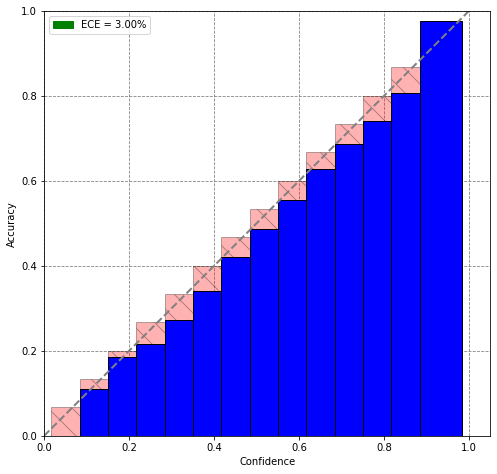

ECE with Deep Ensemble 0.030015379190444946


In [ ]:
model_logits = []

for model in models:
    logits_list = []
    labels_list = []
    model.eval()
    for step, (batch_images, batch_labels) in enumerate(val_loader):
        batch_images = batch_images.cuda()
        batch_labels = batch_labels.cuda()
        with torch.no_grad():
            # Forward propagation
            outputs = model(batch_images)     
            logits_list.append(outputs)
            labels_list.append(batch_labels)
    model_logits.append(torch.cat(logits_list).cuda())

logits = torch.stack(model_logits).cuda()
labels = torch.cat(labels_list).cuda()
print(logits.size())
print(labels.size())
print("---- Confidence graph with Deep Ensemble----")
ece_criterion = _ECELoss()
ece_mc, accuracy_list_mc, confidence_list_mc = ece_criterion(logits, labels, deep_ensemble=True)
print("ECE with Deep Ensemble", ece_mc.item())

## F. Analysis and conclusions

**\Q16 inspired by this [paper](https://arxiv.org/abs/1912.02757) propose a way to study the diversity of MC dropout and Deep Ensembles**

In [ ]:
model_logits_ensemble = []

In [ ]:
model_logits_ensemble = []
model_logits_dropout = []

# Get predictions for the base model:
logits_list = []
for step, (batch_images, batch_labels) in enumerate(val_loader):
    batch_images = batch_images.cuda()
    model.eval()
    with torch.no_grad():
        # Forward propagation
        outputs = model(batch_images)
        logits_list.append(outputs)

logits_base = torch.cat(logits_list).cpu()

# Get predictions for Deep Ensemble:
for model in models:
    logits_list = []
    model.eval()
    for step, (batch_images, batch_labels) in enumerate(val_loader):
        batch_images = batch_images.cuda()
        with torch.no_grad():
            # Forward propagation
            outputs = model(batch_images)     
            logits_list.append(outputs)
    model_logits_ensemble.append(torch.cat(logits_list).cpu())

logits_ensemble = torch.stack(model_logits_ensemble).cpu()

# Get predictions for MC Dropout:
for i in range(3):
    logits_list = []
    for step, (batch_images, batch_labels) in enumerate(val_loader):
        batch_images = batch_images.cuda()
        model.train() # Set training to True to use dropout during test time
        with torch.no_grad():
            # Forward propagation
            outputs = model(batch_images)     
            logits_list.append(outputs)
    model_logits_dropout.append(torch.cat(logits_list).cpu())

logits_dropout = torch.stack(model_logits_dropout).cpu()

In [ ]:
labels_base = logits_base.argmax(axis = 1)
labels_ensemble = logits_ensemble.argmax(axis = 2)
labels_dropout = logits_dropout.argmax(axis = 2)

In [ ]:
for i in range(3):
    print("Deep ensemble {} disagreement with base model: {} %".format(i, (labels_base != labels_ensemble[i]).type(torch.float).mean().item() * 100))
for i in range(3):
    print("MC Dropout {} disagreement with base model: {} %".format(i, (labels_base != labels_dropout[i]).type(torch.float).mean().item() * 100))

Deep ensemble 0 disagreement with base model: 5.514633655548096 %
Deep ensemble 1 disagreement with base model: 5.273520573973656 %
Deep ensemble 2 disagreement with base model: 0.0 %
MC Dropout 0 disagreement with base model: 10.535071790218353 %
MC Dropout 1 disagreement with base model: 10.706998407840729 %
MC Dropout 2 disagreement with base model: 10.575729608535767 %


We can see that the three models used in MC Drop-out all have a disagreement rate of about 5% with the base model. Of the three models from Deep Ensemble, two have a disagreement rate of about 10% with the base model and the last one of 0%. It seems that the diversity provided by MC Drop-out is more consistent but potentially less important than that provided by Deep Ensemble. However, it would be interesting to compare with a larger number of models for a more statistically interesting comparison. 

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
y = ["Base model"] + ["Deep Ensemble"] * 3 + ["MC Drop-out"] * 3

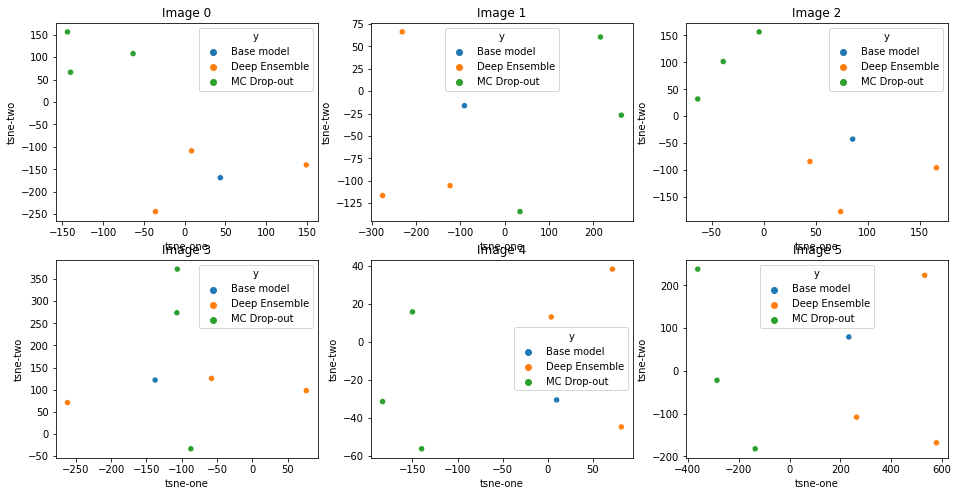

In [ ]:
plt.figure(figsize=(16,8))

for i in range(6):
    logits_cat = torch.cat([logits_base[i].flatten().unsqueeze(0),
                            logits_ensemble[:,i,:,:,:].flatten(1,-1),
                            logits_dropout[:,i,:,:,:].flatten(1,-1)]).numpy()

    tsne = TSNE(n_components=2, verbose=0, perplexity=3)
    tsne_data = tsne.fit_transform(logits_cat)

    df_subset = pd.DataFrame(tsne_data, columns = ['tsne-one', 'tsne-two'])
    df_subset["y"] = y

    plt.subplot(2, 3, i+1)
    sns.scatterplot(
        x="tsne-one", y="tsne-two",
        hue="y",
        data=df_subset,
    )
    plt.title("Image " + str(i))

plt.show()

The above plot shows the t-SNE of flattened logits from each models (the base one, those from MC Drop-out and those from Deep Ensemble), on 6 images of the validation set. In the six cases, we do not see any cluster forming around the base model's logits. Thus, neither method clearly stands out in terms of the diversity brought to the logits. 

**\Q17 Propose a last code to quantify epistemic uncertainty of a DNN**
For exemple you can use [OVNNI](https://arxiv.org/abs/2006.00954)

This method consists in mixing the
predictions of an ensemble of DNNs trained to classify One class vs All
the other classes (OVA) with predictions from a standard DNN trained to
perform All vs All (AVA) classification. On the one hand, the adjustment
provided by the AVA DNN to the score of the base classifiers allows for a
more fine-grained inter-class separation. On the other hand, the two types
of classifiers enforce mutually their detection of out-of-distribution (OOD)
samples, circumventing entirely the requirement of using such samples
during training. 

In this paper, we propose to use OVA learning in order to improve the
quantification of the epistemic uncertainty of the DNN. The underlying idea of
our approach is that the score of a base classifier should be adjusted by a factor
which approximates its local reliability in the input space from which the test
sample originated. 

AVA DNN --> $P(Y = j|X = x_{i}, \omega)$

OVA DNN --> $P(Y_j = 1|X = x_{i}, \omega_j)$

Final confidence score for a data $x_i$ to belong to class j: 

\begin{equation}
p_j(x_i) = P(Y_j = 1|X = x_{i}, \omega_j) P(Y = j|X = x_{i}, \omega)
\end{equation}

---

First let's adapt our training funtion to train our OVA classifiers:

In [ ]:
def train_ova(model, data_loader, optim, criterion, metric, class_considered, iteration_loss=False):
    model.train()
    epoch_loss = 0.0
    metric.reset()

    class_index = list(class_encoding).index(class_considered)

    for step, batch_data in enumerate(data_loader):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        # We train an OVA model --> conversion of all labels that don't correspond to the considered class to 0
        labels = torch.where(labels == class_index, 1, 0)

        # Forward propagation
        outputs = model(inputs)

        # Loss computation
        loss = criterion(outputs, labels)

        # Backpropagation
        optim.zero_grad()
        loss.backward()
        optim.step()

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of the evaluation metric
        metric.add(outputs.detach(), labels.detach())

        if iteration_loss:
            print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss / len(data_loader), metric.value()


def test_ova(model, data_loader, criterion, metric, class_considered, iteration_loss=False):
    model.eval()
    epoch_loss = 0.0
    metric.reset()

    class_index = list(class_encoding).index(class_considered)

    for step, batch_data in enumerate(data_loader):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        # We train an OVA model --> conversion of all labels that don't correspond to the considered class to 0
        labels = torch.where(labels == class_index, 1, 0)

        with torch.no_grad():
            # Forward propagation
            outputs = model(inputs)

            # Loss computation
            loss = criterion(outputs, labels)

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of evaluation the metric
        metric.add(outputs.detach(), labels.detach())

        if iteration_loss:
            print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss / len(data_loader), metric.value()


Then, we train one OVA model for each class:

In [ ]:
print("\nTraining...\n")
num_classes = len(class_encoding)
# Intialize UNet
ova_models = [UNet(2).cuda() for _ in range(num_classes)]

nb_epochs = 5

for i, class_name in enumerate(class_encoding):
  print('>>>> Training model for class {}: '.format(i) + class_name)

  criterion = nn.CrossEntropyLoss()#weight=class_weights)

  # We build the optimizer
  optimizer = optim.Adam(
          ova_models[i].parameters(),
          lr=learning_rate,
          weight_decay=weight_decay)

  # Learning rate decay scheduler
  lr_updater = lr_scheduler.StepLR(optimizer, lr_decay_epochs,
                                      lr_decay)

  # Evaluation metric
  ignore_index=[]
  ignore_index0 = list(class_encoding).index('unlabeled')
  ignore_index.append(ignore_index0)
  ignore_index0 = list(class_encoding).index('pedestrian')
  ignore_index.append(ignore_index0)
  ignore_index0 = list(class_encoding).index('bicyclist')
  ignore_index.append(ignore_index0)
  ignore_index0 = list(class_encoding).index('car')
  ignore_index.append(ignore_index0)

  metric = IoU(2)#, ignore_index=ignore_index)

  # Start Training
  best_miou = 0
  train_loss_history = []
  val_loss_history = []
  train_miou_history = []
  val_miou_history = []
  for epoch in range( nb_epochs):
    print(">>>> [Epoch: {0:d}] Training".format(epoch))
    
    epoch_loss, (iou, miou) = train_ova(ova_models[i], train_loader, optimizer, criterion, metric, class_name) 
    lr_updater.step()
    print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, epoch_loss, miou))
    train_miou=miou
    train_loss=epoch_loss
    if (epoch + 1) % 5 == 0 or epoch + 1 == nb_epochs:

      print(">>>> [Epoch: {0:d}] Validation".format(epoch))
      loss, (iou, miou) = test_ova(ova_models[i], val_loader, criterion, metric, class_name)
      print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, loss, miou))
      train_loss_history.append(train_loss)
      val_loss_history.append(loss)
      train_miou_history.append(train_miou)
      val_miou_history.append(miou)
      # Print per class IoU on last epoch or if best iou
      if epoch + 1 == nb_epochs or miou > best_miou:
        for key, class_iou in zip([class_name, 'other'], iou):
          print("{0}: {1:.4f}".format(key, class_iou))
          # Save the model if it's the best thus far
          '''if miou > best_miou:
            print("\nBest model thus far. Saving...\n")
            best_miou = miou
            utils.save_checkpoint(model, optimizer, epoch + 1, best_miou,
                                        args)'''

  torch.save(ova_models[i].state_dict(), PATH_save + '/ova{}.pt'.format(i))


Training...

>>>> Training model for class 0: sky
>>>> [Epoch: 0] Training
>>>> [Epoch: 0] Avg. loss: 0.3292 | Mean IoU: 0.7958
>>>> [Epoch: 1] Training
>>>> [Epoch: 1] Avg. loss: 0.1497 | Mean IoU: 0.9101
>>>> [Epoch: 2] Training
>>>> [Epoch: 2] Avg. loss: 0.1007 | Mean IoU: 0.9189
>>>> [Epoch: 3] Training
>>>> [Epoch: 3] Avg. loss: 0.0752 | Mean IoU: 0.9319
>>>> [Epoch: 4] Training
>>>> [Epoch: 4] Avg. loss: 0.0659 | Mean IoU: 0.9345
>>>> [Epoch: 4] Validation
>>>> [Epoch: 4] Avg. loss: 0.0296 | Mean IoU: 0.9658
sky: 0.9935
other: 0.9380
>>>> Training model for class 1: building
>>>> [Epoch: 0] Training
>>>> [Epoch: 0] Avg. loss: 0.4118 | Mean IoU: 0.6214
>>>> [Epoch: 1] Training
>>>> [Epoch: 1] Avg. loss: 0.2610 | Mean IoU: 0.7606
>>>> [Epoch: 2] Training
>>>> [Epoch: 2] Avg. loss: 0.2382 | Mean IoU: 0.7714
>>>> [Epoch: 3] Training
>>>> [Epoch: 3] Avg. loss: 0.2138 | Mean IoU: 0.7913
>>>> [Epoch: 4] Training
>>>> [Epoch: 4] Avg. loss: 0.2056 | Mean IoU: 0.7945
>>>> [Epoch: 4] Valid

In [ ]:
ova_models = []
for i in range(13):
  ova_models.append(UNet(2).cuda())
  ova_models[i].load_state_dict(torch.load(PATH_save + '/ova{}.pt'.format(i)))
  ova_models[i].eval()

Finally, let's compute the OVNNI uncertainty of the model on a test image:

In [ ]:
m = torch.nn.Softmax2d()
batch_images, batch_labels = iter(test_loader).next()
batch_images = batch_images.cuda()
batch_labels = batch_labels.cuda()
model.eval()
with torch.no_grad():
  # Forward propagation
  outputs = model(batch_images)
  outputs0 = outputs[:,0:7,:,:]  # we delete the last class since we do not train on that

  # Compute OVNNI uncertainty
  for i in range(7):
    outputs_ova = m(ova_models[i](batch_images))
    outputs0_proba = m(outputs0)
    outputs0_proba[:,i,:,:] *= outputs_ova[:,1,:,:]

  confidence, pred = outputs0_proba.max(1)


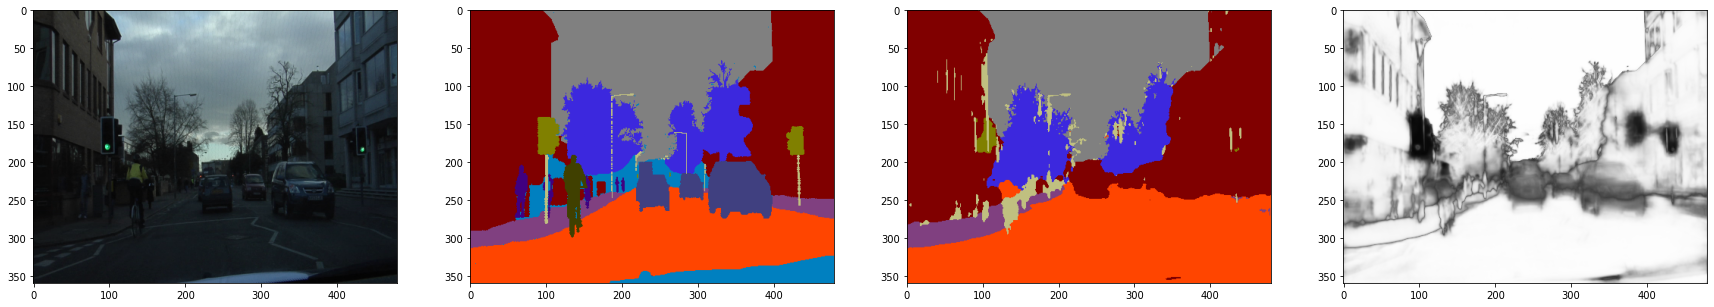

In [ ]:
img_id=0
label_to_rgb = transforms.Compose([
        LongTensorToRGBPIL(class_encoding),
        transforms.ToTensor()])
color_predictions = batch_transform(pred.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy()
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidenceimg = torchvision.utils.make_grid(confidence[img_id].cpu()).numpy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()

We can see that our predictions work well and the uncertainties are in line with the classical evaluation. However we notice that the network is less confident while trying to recognize the traffic lights.

# Conclusion

We tested several ways for improving the uncertainty of our model. The 3 methods tested in this project all led to better results in terms of model calibration than the original model. We also implemented OVNNI for computing the epistemic uncertainty, which yielded results in line with our expectations.